In [2]:
import pandas as pd
data = pd.read_csv("fer2013.csv")

In [3]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
print('Samples Distribution Across Usage:')
print(data.Usage.value_counts())

Samples Distribution Across Usage:
Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64


In [5]:
print('Samples per Emotion:')
print(data.emotion.value_counts())

Samples per Emotion:
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64


In [6]:
print('Number of Pixels for a sample:')
print(len(data.pixels[0].split(' ')))

Number of Pixels for a sample:
2304


In [7]:
trainSet = data[(data.Usage == 'Training')]
validationSet = data[(data.Usage == 'PublicTest')]
testSet = data[(data.Usage == 'PrivateTest')]
print(len(testSet))

3589


In [8]:
emotionLabels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
numClasses = len(emotionLabels)
numClasses

7

In [9]:
from math import sqrt
depth = 1
height = int(sqrt(len(data.pixels[0].split(' '))))
width = height
width

48

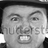

Angry


In [10]:
sampleNumber = 76

import numpy as np
from PIL import Image #--------------------------------------------Change Detected--------------------------------------------#
from IPython.display import display

array = np.mat(data.pixels[sampleNumber]).reshape(48, 48)
image = Image.fromarray(np.uint8(array), 'L')
display(image)
print(emotionLabels[data.emotion[sampleNumber]])

In [11]:
XTrain = np.array(list(map(str.split, trainSet.pixels)), np.float32)
XValidation = np.array(list(map(str.split, validationSet.pixels)), np.float32)
XTest = np.array(list(map(str.split, testSet.pixels)), np.float32)

numTrain = XTrain.shape[0]
numVal = XValidation.shape[0]
numTest = XTest.shape[0]

XTrain = XTrain.reshape(numTrain, width, height, depth)
XValidation = XValidation.reshape(numVal, width, height, depth)
XTest = XTest.reshape(numTest, width, height, depth)

print('Training: ', XTrain.shape)
print('Validation: ', XValidation.shape)
print('Test: ', XTest.shape)

Training:  (28709, 48, 48, 1)
Validation:  (3589, 48, 48, 1)
Test:  (3589, 48, 48, 1)


In [12]:
from keras.utils import np_utils

YTrain = trainSet.emotion
YTrain = np_utils.to_categorical(YTrain, numClasses)

YValidation = validationSet.emotion
YValidation = np_utils.to_categorical(YValidation, numClasses)

YTest = testSet.emotion
YTest = np_utils.to_categorical(YTest, numClasses)

print('Training: ', YTrain.shape)
print('Validation: ', YValidation.shape)
print('Test: ', YTest.shape)

Training:  (28709, 7)
Validation:  (3589, 7)
Test:  (3589, 7)


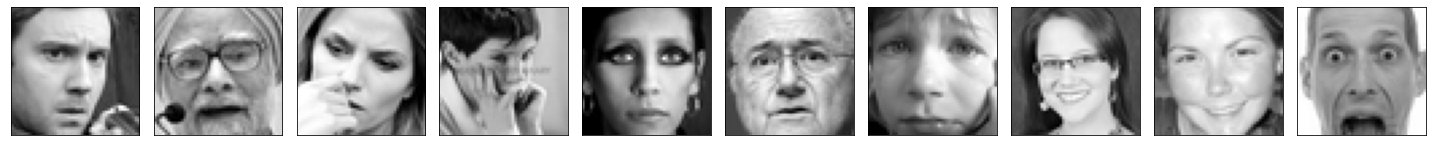

In [13]:
import matplotlib
import matplotlib.pyplot as plt
def overview(start, end, X):
    fig = plt.figure(figsize = (20, 20))
    for i in range(start, end):
        inputImage = X[i:(i+1),:,:,:]
        ax = fig.add_subplot(10, 10, i+1)
        ax.imshow(inputImage[0,:,:,0], cmap = matplotlib.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()
overview(0,10, XTrain)

In [14]:
from keras.layers import Convolution2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten, AveragePooling2D
from keras.models import Sequential

model = Sequential()

model.add(Convolution2D(64, (3, 1), padding = 'same', input_shape = (48, 48, 1)))
model.add(Convolution2D(64, (1, 3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = None, padding = 'same'))
model.add(Dropout(0.25))

model.add(Convolution2D(128, (3, 1), padding = 'same'))
model.add(Convolution2D(128, (1, 3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = None, padding = 'same'))
model.add(Dropout(0.25))

model.add(Convolution2D(256, (3, 1), padding = 'same'))
model.add(Convolution2D(256, (1, 3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = None, padding = 'same'))
model.add(Dropout(0.25))

model.add(Convolution2D(512, (3, 1), padding = 'same'))
model.add(Convolution2D(512, (1, 3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = None, padding = 'same'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7))
model.add(Activation('softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        12352     
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       2

In [16]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization = False,
    zca_whitening = False,
    rotation_range = 0,
    width_shift_range = 0.0,
    height_shift_range = 0.0,
    horizontal_flip = True,
    vertical_flip = False
)

datagen.fit(XTrain)
datagen.fit(XValidation)

In [17]:
batch_size = 32
num_epochs = 25

In [19]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

filepath = 'Model.{epoch:02d}-{val_acc:4f}.hdf5'
checkpointer = ModelCheckpoint(filepath, monitor = 'val_loss', verbose = 1, save_best_only = False, mode = 'auto')
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 10,  verbose = 0, mode = 'auto', min_delta = 0.0001, cooldown = 0, min_lr = 0)
early_stop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 0, verbose = 0, mode = 'auto')

In [21]:
from keras import backend as bk

def fbeta(y_true, y_pred, threshold_shift = 0):
    beta = 1
    
    y_pred = bk.clip(y_pred, 0, 1)
    
    y_pred_bin = bk.round(y_pred + threshold_shift)
    
    tp = bk.sum(bk.round(y_true * y_pred_bin), axis = 1) + bk.epsilon()
    fp = bk.sum(bk.round(bk.clip(y_pred_bin - y_true, 0, 1)), axis = 1)
    fn = bk.sum(bk.round(bk.clip(y_true - y_pred, 0, 1)), axis = 1)
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    
    beta_squared = beta ** 2
    return bk.mean((beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall + bk.epsilon()))

In [22]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = [fbeta, 'acc']
)

In [23]:
train_flow = datagen.flow(XTrain, YTrain, batch_size = batch_size)
validation_flow = datagen.flow(XValidation, YValidation)

In [24]:
%%time
history = model.fit_generator(train_flow, 
                             steps_per_epoch = len(XTrain) / batch_size,
                             epochs = num_epochs,
                             verbose = 1,
                             validation_data = validation_flow,
                             validation_steps = len(XValidation) / batch_size,
                             callbacks = [checkpointer, reduce_lr, checkpointer])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
898/897 [==============================] - ETA: 0s - loss: 1.6750 - fbeta: 0.1460 - acc: 0.3493
Epoch 00001: saving model to Model.01-0.368348.hdf5

Epoch 00001: saving model to Model.01-0.368348.hdf5
898/897 [==============================] - 681s 758ms/step - loss: 1.6750 - fbeta: 0.1460 - acc: 0.3493 - val_loss: 1.5994 - val_fbeta: 0.1945 - val_acc: 0.3683
Epoch 2/25
898/897 [==============================] - ETA: 0s - loss: 1.3616 - fbeta: 0.2570 - acc: 0.4780
Epoch 00002: saving model to Model.02-0.432154.hdf5

Epoch 00002: saving model to Model.02-0.432154.hdf5
898/897 [==============================] - 676s 753ms/step - loss: 1.3616 - fbeta: 0.2570 - acc: 0.4780 - val_loss: 1.4287 - val_fbeta: 0.2754 - val_acc: 0.4322
Epoch 3/25
898/897 [==============================] - ETA: 0s - loss: 1.2747 - fbeta: 0.3028 - acc: 0.5123
Epoch 00003: saving model to Model.03-0.503483.hdf5

Epoch 00003: savin

898/897 [==============================] - ETA: 0s - loss: 0.8967 - fbeta: 0.5413 - acc: 0.6634
Epoch 00022: saving model to Model.22-0.614656.hdf5

Epoch 00022: saving model to Model.22-0.614656.hdf5
898/897 [==============================] - 686s 764ms/step - loss: 0.8967 - fbeta: 0.5413 - acc: 0.6634 - val_loss: 1.0183 - val_fbeta: 0.4904 - val_acc: 0.6147
Epoch 23/25
898/897 [==============================] - ETA: 0s - loss: 0.8794 - fbeta: 0.5528 - acc: 0.6709
Epoch 00023: saving model to Model.23-0.631652.hdf5

Epoch 00023: saving model to Model.23-0.631652.hdf5
898/897 [==============================] - 807s 899ms/step - loss: 0.8794 - fbeta: 0.5528 - acc: 0.6709 - val_loss: 0.9946 - val_fbeta: 0.5177 - val_acc: 0.6317
Epoch 24/25
898/897 [==============================] - ETA: 0s - loss: 0.8744 - fbeta: 0.5551 - acc: 0.6700
Epoch 00024: saving model to Model.24-0.637504.hdf5

Epoch 00024: saving model to Model.24-0.637504.hdf5
898/897 [==============================] - 861s 959

In [26]:
score = model.evaluate(XTest, YTest, steps = len(XTest) / batch_size)
print('Evaluation Loss: ', score[0])
print('Evaluation Accuracy: ', score[1])

113/112 [==============================] - 16s 139ms/step - loss: 1.0164 - fbeta: 0.4978 - acc: 0.6269
Evaluation Loss:  1.0164217948913574
Evaluation Accuracy:  0.497842937707901


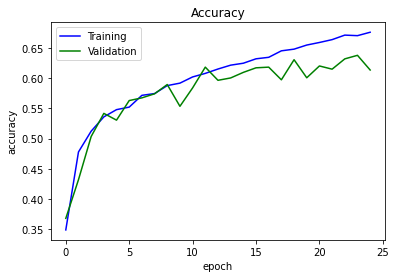

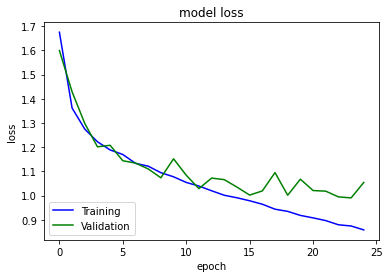

In [27]:
# summarize history for accuracy
plt.plot(history.history['acc'], color='b', label='Training')
plt.plot(history.history['val_acc'], color='g', label='Validation')
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'], color='b', label='Training')
plt.plot(history.history['val_loss'], color='g', label='Validation')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='lower left')
plt.show()

In [29]:
y_pred = model.predict_classes(XTest)
y_true = np.asarray([np.argmax(i) for i in YTest])

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
cm_normalised = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set(font_scale=1.5) 
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(cm_normalised, annot=True, linewidths=0, square=False, 
                    cmap="Greens", yticklabels=emotion_labels, xticklabels=emotion_labels, vmin=0, vmax=np.max(cm_normalised), 
                    fmt=".2f", annot_kws={"size": 20})
ax.set(xlabel='Predicted label', ylabel='True label')

ModuleNotFoundError: No module named 'sklearn'

In [31]:
model_json = model.to_json()
with open("model.json","w") as json_file:
     json_file.write(model_json)

model.save('weights.h5')